# **Walmart Sales Forecasting Dataset**

You are hired as a Junior Data Analyst at Walmart.

Your job is to analyze sales patterns across stores and departments to help management make data-driven decisions.
You are given multiple datasets (features.csv, sales.csv, stores.csv).

You must merge and analyze them to extract useful insights.
Walmart Recruiting - Store Sales Forecasting<br>
Use historical markdown data to predict store sales

## **Task 1 — Data Loading, Merging & Initial Inspection**

1.Load all required **CSV** files into your notebook.
2.Merge them into one dataset using `Store`, `Dept`, and `Date`.<br>
3.Display the first and last 10 rows.<br>
4.:
`.shape`
`.info()`
`.describe()`<br>
5.Identify:
Numerical columns,
Categorical columns,
Date columns<br>
6.List all unique store types and departments.<br>
7. Identify which columns may require cleaning or type conversion

In [4]:
import pandas as pd

In [5]:
features = pd.read_csv(r"C:\Users\DELL\Downloads\features.csv")
sales = pd.read_csv(r"C:\Users\DELL\Downloads\train.csv")
stores = pd.read_csv(r"C:\Users\DELL\Downloads\stores.csv")

In [6]:
print(features.columns)
print(sales.columns)
print(stores.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')


In [7]:
df = sales.merge(features,on=["Store","Date"],how="left")

In [8]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [9]:
df = df.merge(stores,on='Store',how="left")

In [10]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [11]:
print("First 10 rows --- ")
print(df.head(10))
print("Last 10 rows --- ")
print(df.tail(10))

First 10 rows --- 
   Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   
5      1     1  2010-03-12      21043.39        False        57.79   
6      1     1  2010-03-19      22136.64        False        54.58   
7      1     1  2010-03-26      26229.21        False        51.45   
8      1     1  2010-04-02      57258.43        False        62.27   
9      1     1  2010-04-09      42960.91        False        65.86   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        N

In [12]:
df.shape

(421570, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [14]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [15]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
Type             object
Size              int64
dtype: object

In [16]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print("numerical columns are: ",numeric_cols)

numerical columns are:  Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')


In [17]:
cat_cols = df.select_dtypes(include=['object']).columns
print("categorical columns are: ",cat_cols)

categorical columns are:  Index(['Date', 'Type'], dtype='object')


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
print("date converted")
print("After conversion:datatype--- ",df['Date'].dtype)

date converted
After conversion:datatype---  datetime64[ns]


In [19]:
print("Store Types:", df['Type'].unique())
print("Departments:", df['Dept'].unique())

Store Types: ['A' 'B' 'C']
Departments: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [20]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


## **Task 2 — Data Cleaning**

1.Identify missing values using `.isnull().sum()`.<br>
2.Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.<br>
3.Fill missing markdown-related fields with mean values.<br>
4.Convert Date column to datetime format.<br>
5.Remove duplicate rows.<br>
6.Reset the index after cleaning.<br>

In [21]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


In [22]:
num_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [23]:
cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4']
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
print("date converted")

date converted


In [25]:
df = df.drop_duplicates()

In [26]:
df = df.reset_index(drop=True)

## **Task 3 — Outlier Detection & Treatment**

Detect outliers in:
`Weekly_Sales`,
`Temperature`,
`Fuel_Price`,
`CPI`<br>
Use:
**Boxplots**,
**IQR method**<br>
Identify if extreme sales spikes occur during holiday weeks.<br>
Decide which outliers should be:
Removed
Capped
Kept as business outliers

**1. Boxplots to VISUALIZE outliers**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

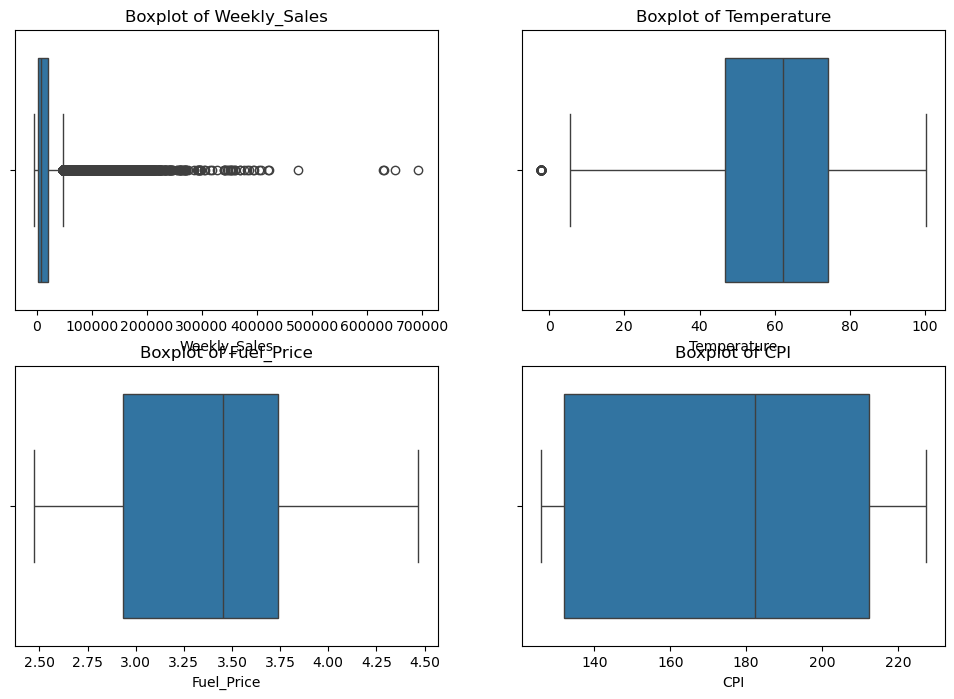

In [28]:
colms = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI']
plt.figure(figsize=(12,8))
for i,col in enumerate(colms,1):
    plt.subplot(2,2,i);
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()

**2. IQR Method to detect Outliers**

In [29]:
def detect_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = (df[col]>upper) | (df[col]<lower)
    return lower,upper,outliers
for col in colms:
    lb,ub,outliers = detect_outliers(df,col)
    print(f"Lower bound of {col} is : {lb}")
    print(f"Upper bound of {col} is : {ub}")
    print(f"Outliers detected for {col} : {len(outliers)}")
    print()

Lower bound of Weekly_Sales is : -25109.653749999998
Upper bound of Weekly_Sales is : 47395.15625
Outliers detected for Weekly_Sales : 421570

Lower bound of Temperature is : 5.279999999999994
Upper bound of Temperature is : 115.68
Outliers detected for Temperature : 421570

Lower bound of Fuel_Price is : 1.7254999999999996
Upper bound of Fuel_Price is : 4.9455
Outliers detected for Fuel_Price : 421570

Lower bound of CPI is : 11.431177550000001
Upper bound of CPI is : 333.00848195000003
Outliers detected for CPI : 421570



**3. Detect Extreme Sales Spikes During Holiday Weeks**

In [30]:
holiday_spikes = df[(df['Weekly_Sales'] > df['Weekly_Sales'].quantile(0.99)) &
                    (df['IsHoliday_x'] == True)]

print("Extreme holiday week spikes:")
print(holiday_spikes[['Date','Weekly_Sales','IsHoliday_x']].head())


Extreme holiday week spikes:
           Date  Weekly_Sales  IsHoliday_x
7689 2010-11-26     196810.42         True
7741 2011-11-25     203670.47         True
9035 2011-11-25     107508.68         True
9228 2010-02-12     143081.42         True
9258 2010-09-10     134373.61         True


In [31]:
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    data[col] = data[col].clip(lower, upper)
    return data

for col in ['Temperature', 'Fuel_Price', 'CPI']:
    df = cap_outliers(df, col)


In [32]:
lb, ub, outs = detect_outliers(df, 'Weekly_Sales')

# cap non-holiday outliers
mask = (df['Weekly_Sales'] > ub) & (df['IsHoliday_x'] == False)
df.loc[mask, 'Weekly_Sales'] = ub


## **Task 4 — Univariate Analysis**

Perform **univariate** analysis (one variable at a time):<BR>
Weekly sales distribution (Histogram + KDE).<br>
Store type distribution (Count plot).<br>
Distribution of `Temperature`, `Fuel Price`, `CPI`, `Unemployment`.<br>
Distribution of sales during:<br>
Holiday weeks<br>
Non-holiday weeks<br>
Identify **top 10** departments by average weekly sales.<br>

**1. Weekly Sales Distribution (Histogram + KDE)**

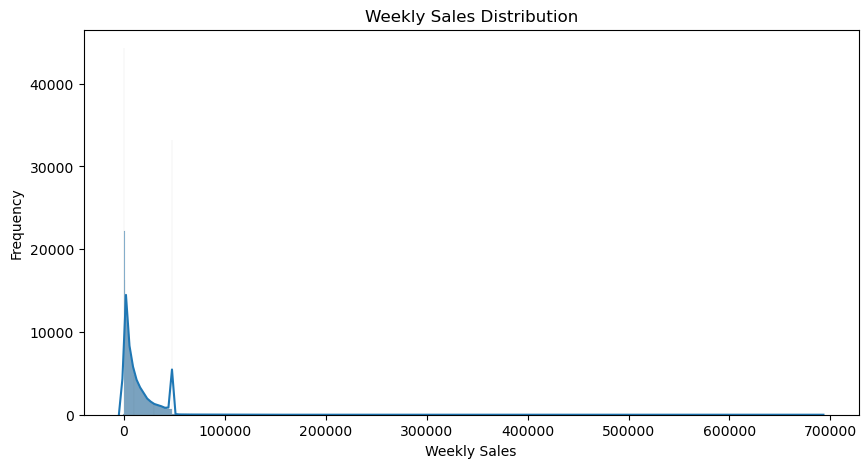

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title("Weekly Sales Distribution")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

**2. Store Type Distribution (Count Plot)**

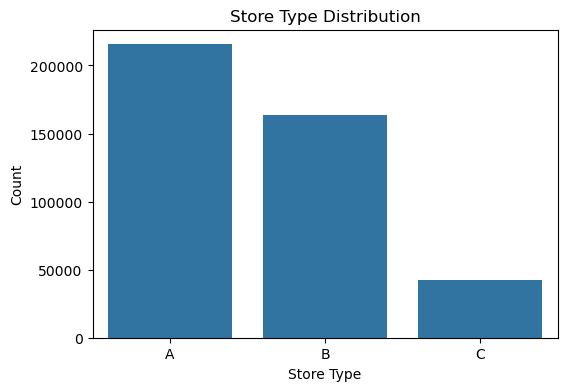

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Type'])
plt.title("Store Type Distribution")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.show()

**3. Distribution of Temperature, Fuel Price, CPI, Unemployment**

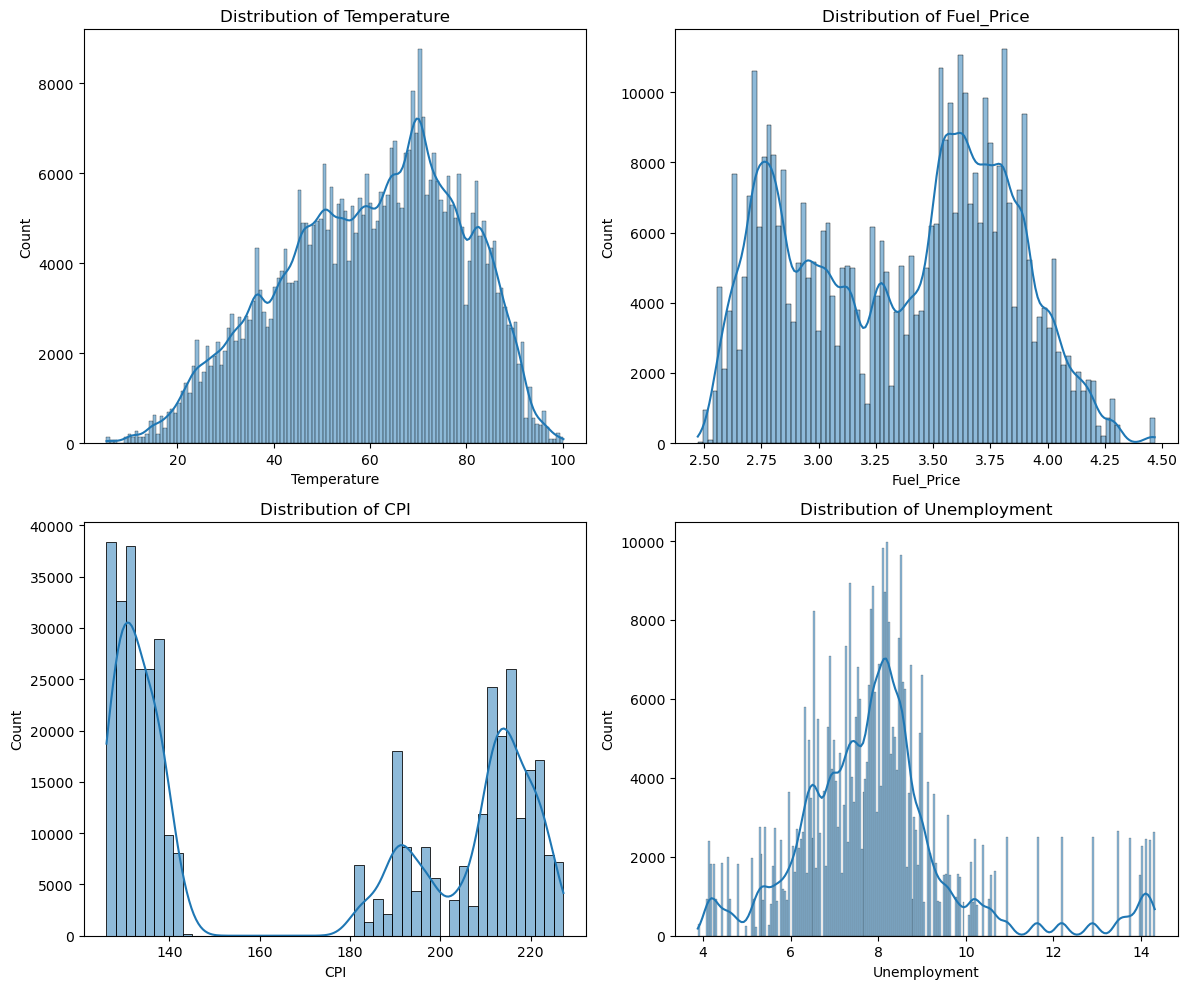

In [35]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(12,10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


**4. Sales Distribution During Holiday & Non-Holiday Weeks**

Holiday Weeks

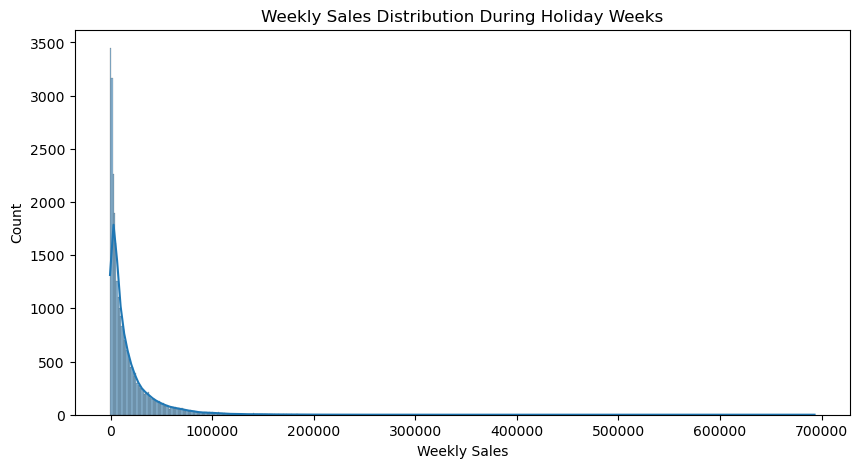

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['IsHoliday_x'] == True]['Weekly_Sales'], kde=True)
plt.title("Weekly Sales Distribution During Holiday Weeks")
plt.xlabel("Weekly Sales")
plt.show()

Non-Holiday Weeks

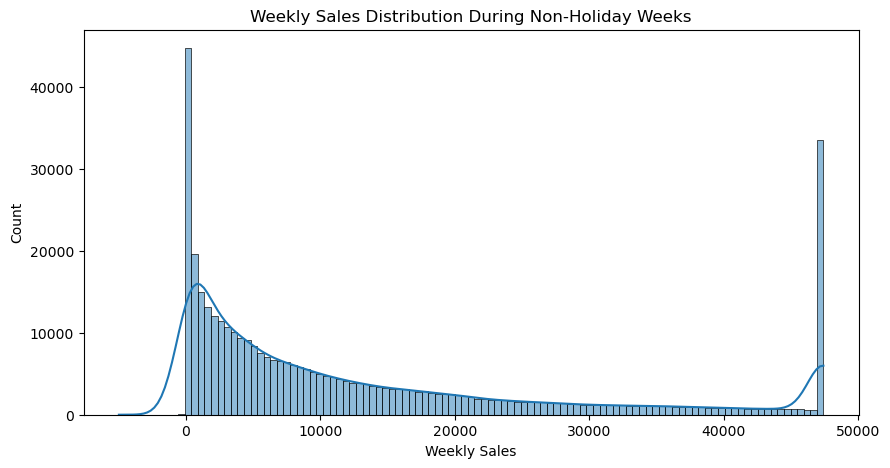

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['IsHoliday_x'] == False]['Weekly_Sales'], kde=True)
plt.title("Weekly Sales Distribution During Non-Holiday Weeks")
plt.xlabel("Weekly Sales")
plt.show()

**5. Top 10 Departments by Average Weekly Sales**

Dept
38    44800.799083
95    44123.890781
65    43716.444327
92    42926.589035
72    39437.597830
40    37524.777181
2     35433.667488
90    33370.847550
13    29078.558181
94    28691.091538
Name: Weekly_Sales, dtype: float64


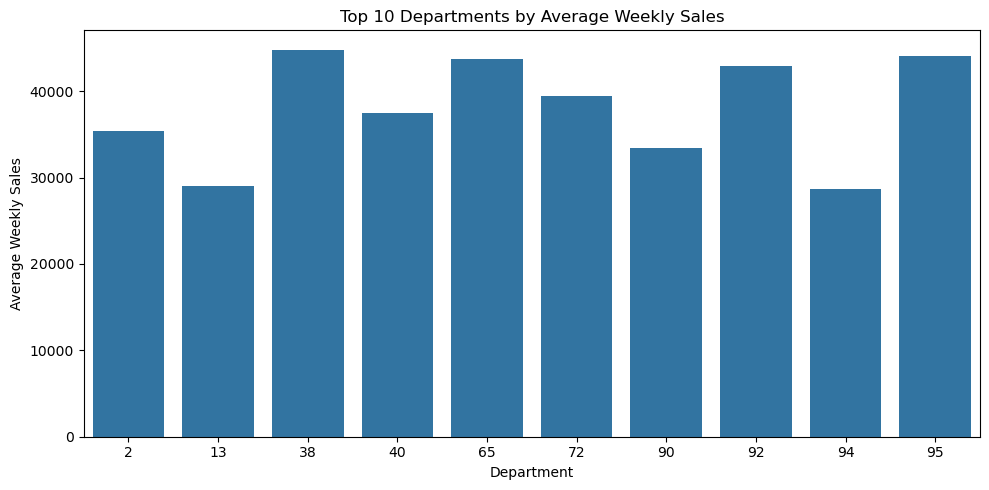

In [38]:
top10 = df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
print(top10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.title("Top 10 Departments by Average Weekly Sales")
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()

## **Task 5 — Bivariate Analysis**

Study the relationship between two variables:<br>
Relationship between Temperature & Weekly Sales `(scatter plot)`.<br>
Relationship between Fuel Price & Weekly Sales.<br>
Weekly Sales vs. Store Type.<br>
Weekly Sales vs. Holiday_Flag.<br>
Compare sales between:
Top-performing store,
Lowest-performing store

**Temperature vs Weekly Sales (Scatter Plot)**

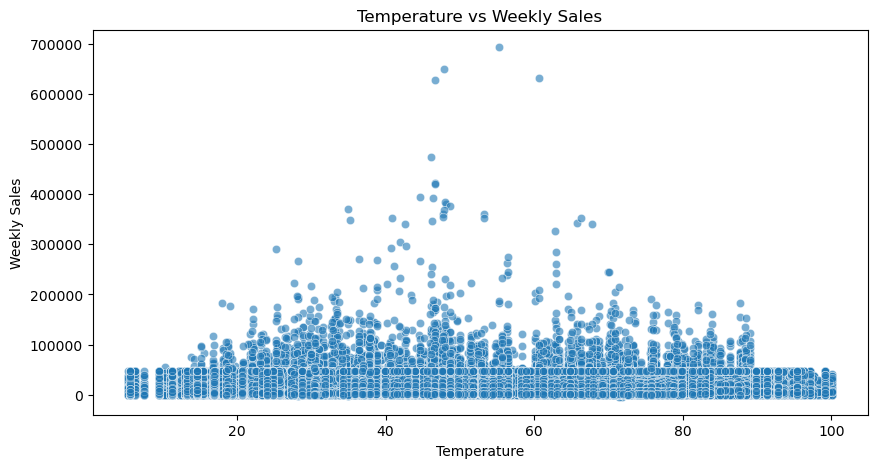

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.6)
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

**Fuel Price vs Weekly Sales (Scatter Plot)**

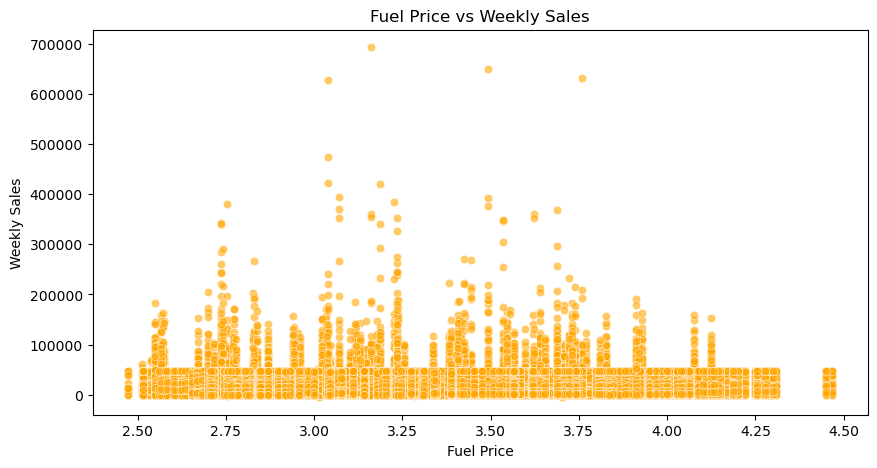

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.6, color='orange')
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()

**Weekly Sales vs Store Type (Boxplot)**

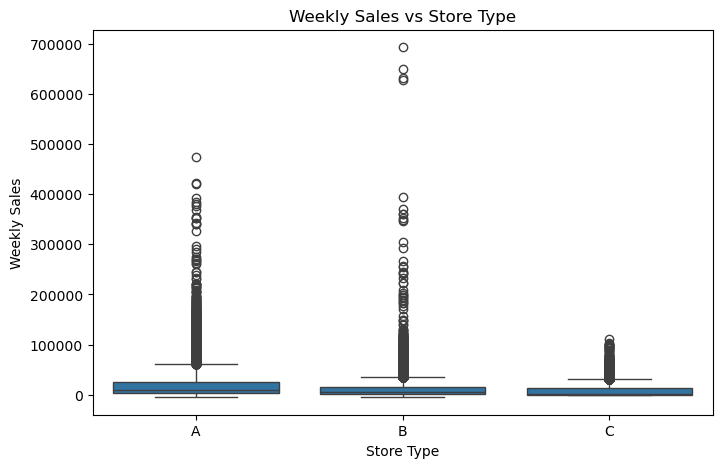

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title("Weekly Sales vs Store Type")
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.show()

**Weekly Sales vs Holiday Flag (Boxplot)**

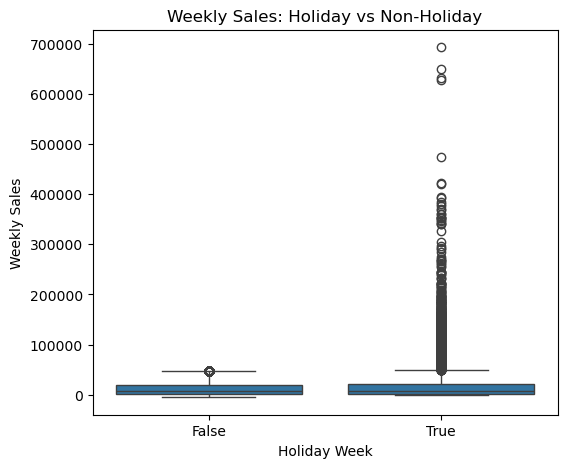

In [42]:
plt.figure(figsize=(6,5))
sns.boxplot(x='IsHoliday_x', y='Weekly_Sales', data=df)
plt.title("Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday Week")
plt.ylabel("Weekly Sales")
plt.show()

**Compare Sales Between Top vs Lowest Performing Stores**

### **Step 1: Identify top & lowest stores**

In [43]:
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean()
top_store = store_avg_sales.idxmax()
low_store = store_avg_sales.idxmin()
print(f"Top-performing Store: {top_store}, Lowest-performing Store: {low_store}")

Top-performing Store: 4, Lowest-performing Store: 5


### **Step 2: Compare with boxplot**

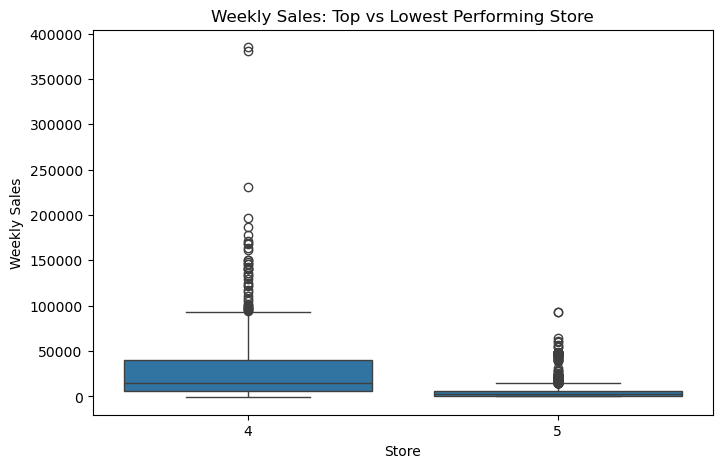

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Store', y='Weekly_Sales', data=df[df['Store'].isin([top_store, low_store])])
plt.title("Weekly Sales: Top vs Lowest Performing Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.show()

## **Task 6 — Multivariate Analysis**

Analyze more than two variables together:
Create a correlation heatmap for all numeric features.<br>
Analyze store-level sales using:
Store Type.,
Store Size,
Weekly Sales<br>
**Multivariate relationship:**
Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)<brr>
Analyze whether discount markdowns influence sales when considering:
Date,
Holiday weeks,
Markdown values

**Correlation Heatmap for All Numeric Features**

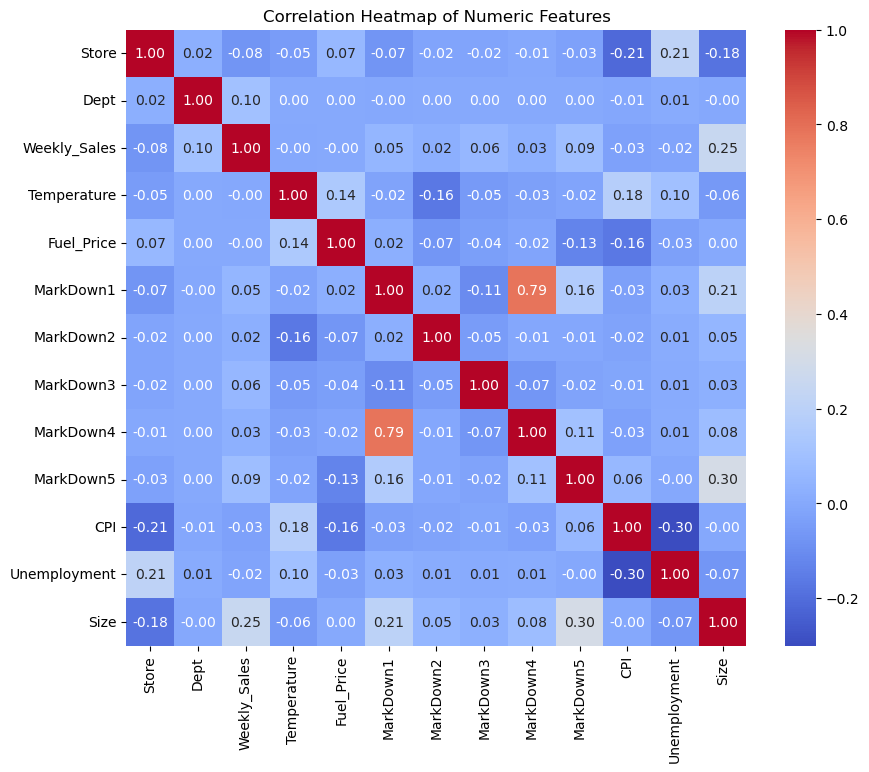

In [45]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

**Store-Level Sales Analysis**

**Boxplot: Store Type vs Weekly Sales**

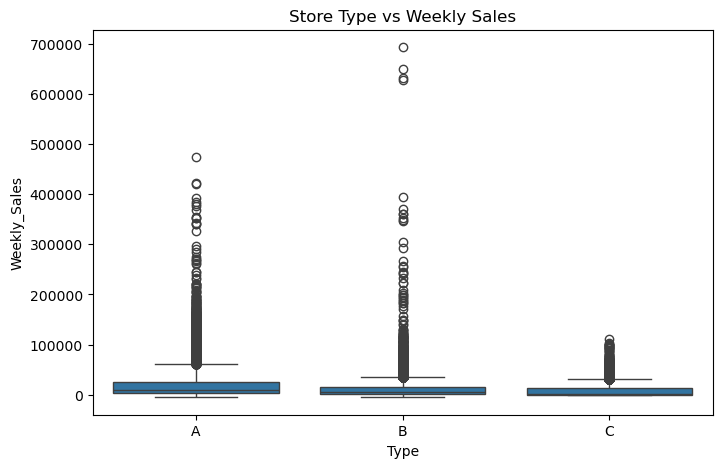

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title("Store Type vs Weekly Sales")
plt.show()

**Scatter: Store Size vs Weekly Sales**

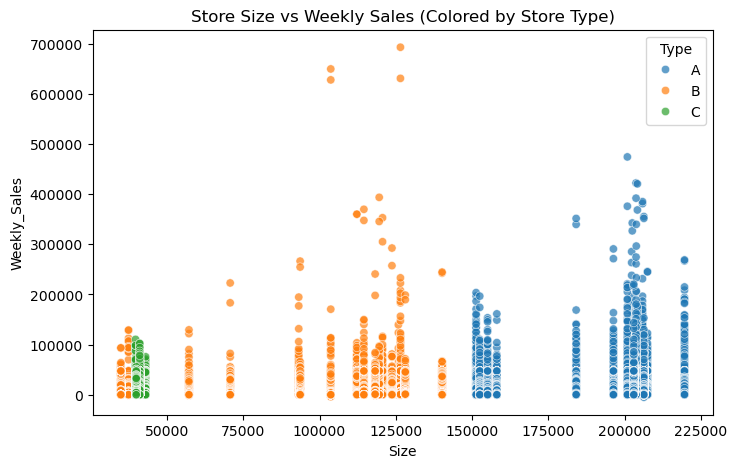

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', data=df, alpha=0.7)
plt.title("Store Size vs Weekly Sales (Colored by Store Type)")
plt.show()

**Weekly Sales vs Temperature vs Holiday Flag**

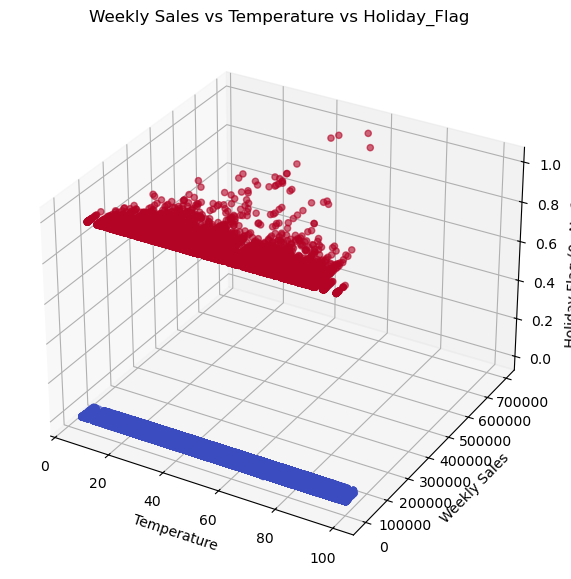

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature'], df['Weekly_Sales'], df['IsHoliday_x'].astype(int), c=df['IsHoliday_x'].astype(int), cmap='coolwarm', alpha=0.6)

ax.set_xlabel('Temperature')
ax.set_ylabel('Weekly Sales')
ax.set_zlabel('Holiday Flag (0=No,1=Yes)')
plt.title("Weekly Sales vs Temperature vs Holiday_Flag")
plt.show()

**Markdown Influence on Sales (Date + Holiday + Markdown)**

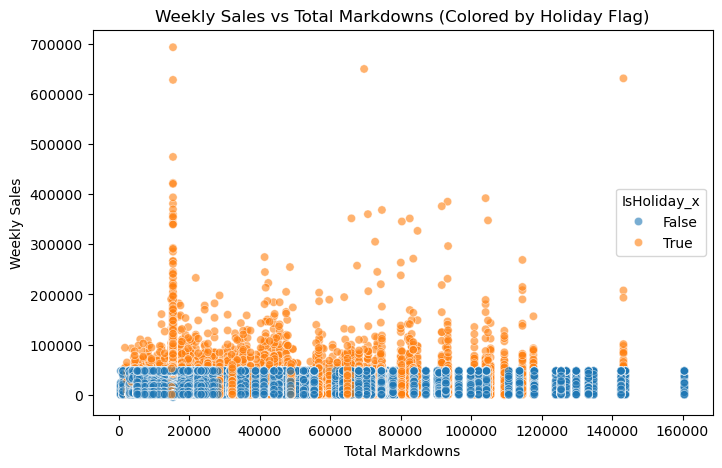

In [52]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

# Aggregate weekly markdowns
df['Total_MarkDown'] = df[markdown_cols].sum(axis=1)

# Boxplot: Total Markdown vs Weekly Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_MarkDown', y='Weekly_Sales', hue='IsHoliday_x', data=df, alpha=0.6)
plt.title("Weekly Sales vs Total Markdowns (Colored by Holiday Flag)")
plt.xlabel("Total Markdowns")
plt.ylabel("Weekly Sales")
plt.show()

## **Task 7 — Time Series Analysis**

Convert Date to:
`Year`,
`Month`,
`Week`<br>
**Plot** total weekly sales over time.<br>
Plot monthly sales trends for:
Store with highest sales,
Store with lowest sales<br>
Identify seasonal patterns:
Which months show peak sales?<br>
Which departments show seasonal demand?

**Extract Year, Month, Week from Date**

In [55]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

In [59]:
df[['Year','Month','Week']].head()

,Year,Month,Week
0,2010,2,5
1,2010,2,6
2,2010,2,7
3,2010,2,8
4,2010,3,9


**Total Weekly Sales Over Time**

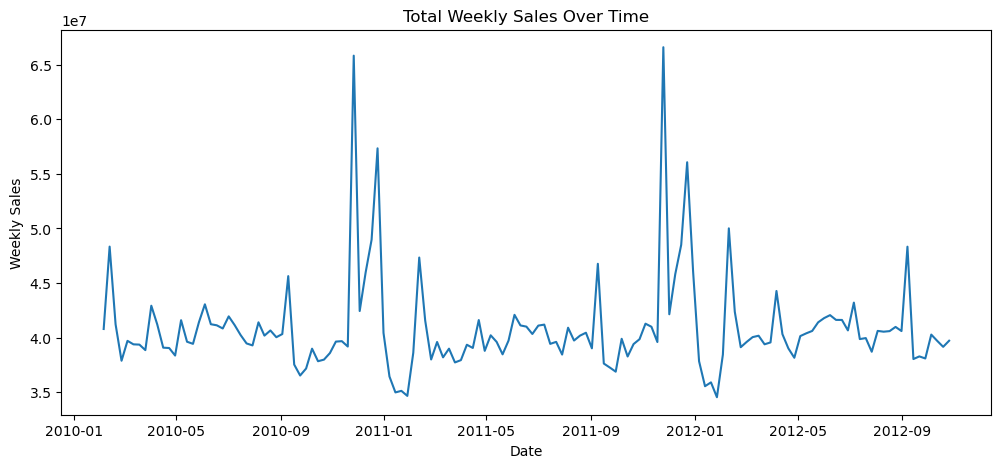

In [60]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Weekly_Sales', data=weekly_sales)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

**Monthly Sales Trends — Top vs Lowest Store**

In [61]:
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean()
top_store = store_avg_sales.idxmax()
low_store = store_avg_sales.idxmin()

In [62]:
monthly_sales_top = df[df['Store']==top_store].groupby('Month')['Weekly_Sales'].sum().reset_index()
monthly_sales_low = df[df['Store']==low_store].groupby('Month')['Weekly_Sales'].sum().reset_index()

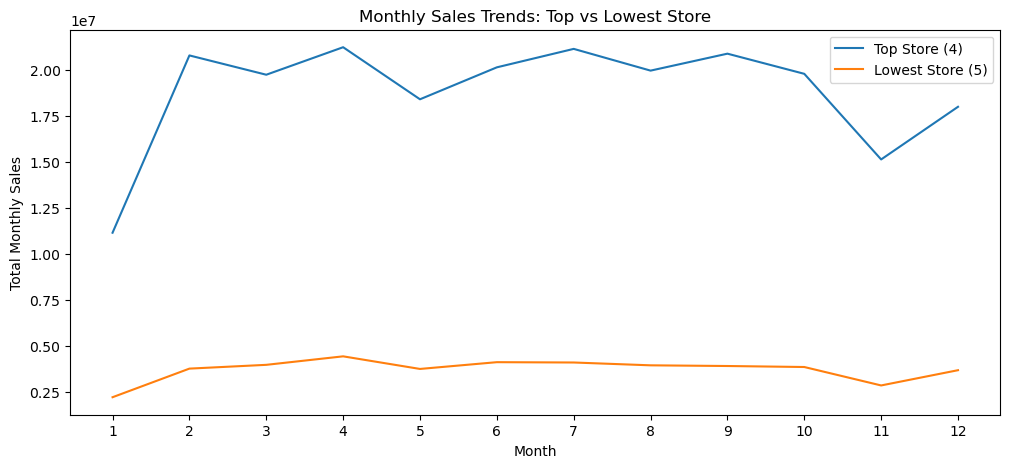

In [63]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Month', y='Weekly_Sales', data=monthly_sales_top, label=f'Top Store ({top_store})')
sns.lineplot(x='Month', y='Weekly_Sales', data=monthly_sales_low, label=f'Lowest Store ({low_store})')
plt.title("Monthly Sales Trends: Top vs Lowest Store")
plt.xlabel("Month")
plt.ylabel("Total Monthly Sales")
plt.xticks(range(1,13))
plt.legend()
plt.show()

**Identify Seasonal Patterns**

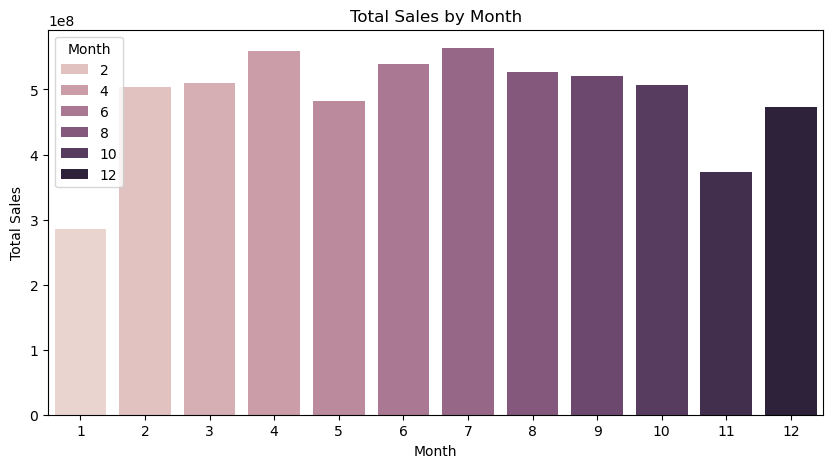

In [67]:
monthly_sales_all = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Weekly_Sales', data=monthly_sales_all, hue='Month', dodge=False)
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

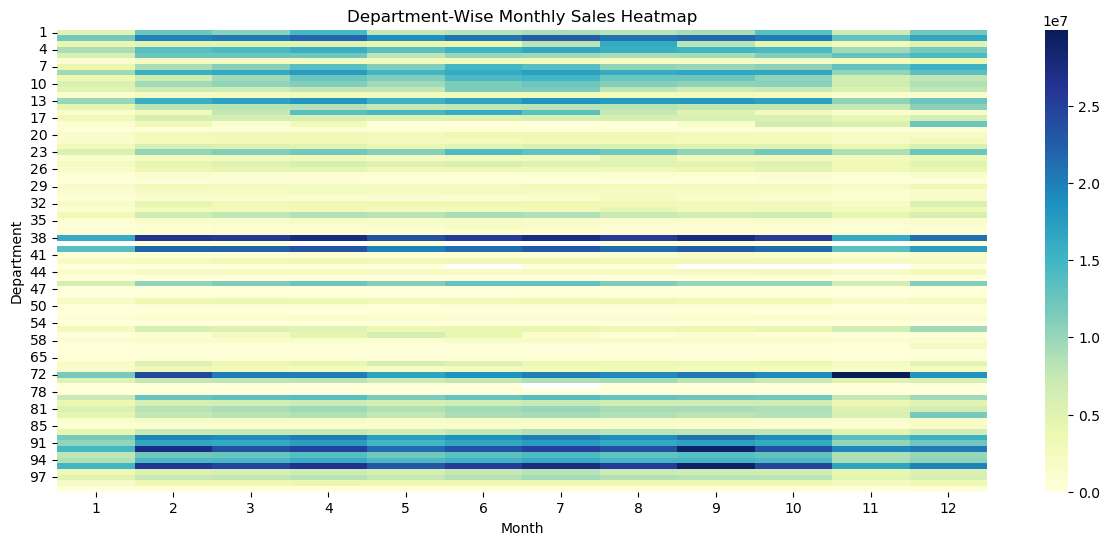

In [68]:
# group by Dept & Month
dept_monthly_sales = df.groupby(['Dept','Month'])['Weekly_Sales'].sum().reset_index()
pivot_table = dept_monthly_sales.pivot(index='Dept', columns='Month', values='Weekly_Sales')
plt.figure(figsize=(15,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title("Department-Wise Monthly Sales Heatmap")
plt.xlabel("Month")
plt.ylabel("Department")
plt.show()

## **Task 8 — Feature Engineering**

## **Task 8A — Create New Columns**

In [72]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# 1️⃣ Extract year, month, week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# 2️⃣ Discount effect
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df['discount_effect'] = df[markdown_cols].sum(axis=1)

# 3️⃣ Peak season flag
df['is_peak_season'] = df['Month'].isin([11,12])

# 4️⃣ Normalized sales
df['normalized_sales'] = df['Weekly_Sales'] / df['Size']

In [73]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,Total_MarkDown,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7246.420196,3334.628621,1439.421384,...,False,A,151315,15403.638457,2010,2,5,15403.638457,False,0.164719
1,1,1,2010-02-12,46039.49,True,38.51,2.548,7246.420196,3334.628621,1439.421384,...,True,A,151315,15403.638457,2010,2,6,15403.638457,False,0.304263
2,1,1,2010-02-19,41595.55,False,39.93,2.514,7246.420196,3334.628621,1439.421384,...,False,A,151315,15403.638457,2010,2,7,15403.638457,False,0.274894
3,1,1,2010-02-26,19403.54,False,46.63,2.561,7246.420196,3334.628621,1439.421384,...,False,A,151315,15403.638457,2010,2,8,15403.638457,False,0.128233
4,1,1,2010-03-05,21827.90,False,46.50,2.625,7246.420196,3334.628621,1439.421384,...,False,A,151315,15403.638457,2010,3,9,15403.638457,False,0.144255


## **Task 8B — Filtering Using Created Columns**

**Peak-season transactions with high sales**

In [74]:
peak_high_sales = df[(df['is_peak_season']==True) & (df['Weekly_Sales'] > 50000)]
print(peak_high_sales.head())

      Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  \
614       1     5 2010-11-26      70158.86         True        64.52   
666       1     5 2011-11-25      79340.15         True        60.14   
900       1     7 2010-11-26      72635.06         True        64.52   
952       1     7 2011-11-25      71151.34         True        60.14   
5160      1    38 2010-11-26      55973.77         True        64.52   

      Fuel_Price    MarkDown1    MarkDown2     MarkDown3  ...  IsHoliday_y  \
614        2.735  7246.420196  3334.628621   1439.421384  ...         True   
666        3.236   410.310000    98.000000  55805.510000  ...         True   
900        2.735  7246.420196  3334.628621   1439.421384  ...         True   
952        3.236   410.310000    98.000000  55805.510000  ...         True   
5160       2.735  7246.420196  3334.628621   1439.421384  ...         True   

      Type    Size  Total_MarkDown  Year Month  Week  discount_effect  \
614      A  151315    154

**Stores in top 10% percentile of normalized_sales**

In [75]:
top_10_percent_sales = df[df['normalized_sales'] >= df['normalized_sales'].quantile(0.9)]
print(top_10_percent_sales.head())

    Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  \
1       1     1 2010-02-12   46039.49000         True        38.51   
2       1     1 2010-02-19   41595.55000        False        39.93   
8       1     1 2010-04-02   47395.15625        False        62.27   
9       1     1 2010-04-09   42960.91000        False        65.86   
45      1     1 2010-12-17   44912.86000        False        49.84   

    Fuel_Price    MarkDown1    MarkDown2    MarkDown3  ...  IsHoliday_y  Type  \
1        2.548  7246.420196  3334.628621  1439.421384  ...         True     A   
2        2.514  7246.420196  3334.628621  1439.421384  ...        False     A   
8        2.719  7246.420196  3334.628621  1439.421384  ...        False     A   
9        2.770  7246.420196  3334.628621  1439.421384  ...        False     A   
45       2.869  7246.420196  3334.628621  1439.421384  ...        False     A   

      Size  Total_MarkDown  Year Month  Week  discount_effect  is_peak_season  \
1   151315 

**Departments with discount_effect above median**

In [76]:
dept_discount_above_median = df[df['discount_effect'] > df['discount_effect'].median()]['Dept'].unique()
print(dept_discount_above_median)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 52 54
 55 56 58 59 60 67 71 72 74 77 79 80 81 82 83 85 87 90 91 92 93 94 95 96
 97 98 99 78 51 50 43 39 65]


**Filter rows with multiple conditions**

In [77]:
filtered_rows = df[
    (df['Temperature'] < 40) &
    (df['Fuel_Price'] > 3.5) &
    (df['Weekly_Sales'].between(20000, 60000)) &
    (df['is_peak_season'] == True)
]
print(filtered_rows.head())

       Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  \
59234      7     2 2011-11-04      21320.52        False        23.41   
60235      7     9 2011-11-04      28969.99        False        23.41   
60378      7    10 2011-11-04      28281.31        False        23.41   
60379      7    10 2011-11-11      23758.50        False        19.53   
60522      7    11 2011-11-11      20611.14        False        19.53   

       Fuel_Price    MarkDown1    MarkDown2    MarkDown3  ...  IsHoliday_y  \
59234       3.527  7246.420196  3334.628621  1439.421384  ...        False   
60235       3.527  7246.420196  3334.628621  1439.421384  ...        False   
60378       3.527  7246.420196  3334.628621  1439.421384  ...        False   
60379       3.505  3307.600000  1431.650000   143.060000  ...        False   
60522       3.505  3307.600000  1431.650000   143.060000  ...        False   

       Type   Size  Total_MarkDown  Year Month  Week  discount_effect  \
59234     B  70713 

## **Task 8C — Grouping & Business Insights**

**Monthly average sales per store**

In [78]:
monthly_avg_sales = df.groupby(['Store','Month'])['Weekly_Sales'].mean().reset_index()
print(monthly_avg_sales.head())

   Store  Month  Weekly_Sales
0      1      1  15591.797795
1      1      2  19087.698940
2      1      3  17503.877781
3      1      4  17390.586515
4      1      5  17397.402755


**Total discount_effect per department**

In [79]:
dept_total_discount = df.groupby('Dept')['discount_effect'].sum().reset_index()
print(dept_total_discount.head())

   Dept  discount_effect
0     1     1.078818e+08
1     2     1.078818e+08
2     3     1.078818e+08
3     4     1.078818e+08
4     5     1.065263e+08


**Department with highest normalized_sales**

In [80]:
dept_norm_sales = df.groupby('Dept')['normalized_sales'].mean().reset_index()
top_dept_norm_sales = dept_norm_sales.sort_values(by='normalized_sales', ascending=False).head(1)
print(top_dept_norm_sales)

    Dept  normalized_sales
36    38          0.480224


**Compute store-wise revenue potential**

In [81]:
df['revenue_potential'] = df['Weekly_Sales'] * 52  # 52 weeks/year
store_revenue = df.groupby('Store')['revenue_potential'].sum().reset_index()
top_10_stores = store_revenue.sort_values(by='revenue_potential', ascending=False).head(10)
print(top_10_stores)

    Store  revenue_potential
3       4       1.175800e+10
19     20       1.169132e+10
12     13       1.130677e+10
9      10       1.121224e+10
1       2       1.099893e+10
13     14       1.099370e+10
26     27       1.065531e+10
5       6       1.023430e+10
22     23       9.467720e+09
0       1       9.435882e+09
